In [49]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [91]:
# data = torch.load("/home/nikin105/mlProject/data/machineLearning/mum5mup5/processed_files/1000",map_location=torch.device('cpu'))
evt_num = 13441
input_dir = f"/home/nikin105/mlProject/data/machineLearning/archive/mum5mup5/training/new-GT/trainingResults/train/{evt_num}"
data = torch.load(input_dir,map_location=torch.device('cpu'))
print(data)
print(data['pid'])

Data(x=[248, 3], pid=[248], layers=[248], event_file='/scratch/tmp/n_inde01/csvFiles/mum5mup5/event0000013441', hid=[248], pt=[248], vertex=[248, 3], charge=[248], pdgcode=[248], ptheta=[248], peta=[248], pphi=[248], time_ordered_true_edges=[2, 476], edge_index=[2, 25200], y_pid=[25200], scores=[50400])
tensor([ 9,  8,  7,  6,  5,  3,  2,  1,  0,  9,  8,  7,  6,  5,  3,  2,  1,  0,
         9,  8,  8,  7,  6,  5,  3,  2,  1,  0,  9,  8,  7,  6,  5,  3,  2,  1,
         0,  9,  8,  7,  7,  6,  5,  3,  2,  0,  9,  9,  8,  7,  6,  5,  3,  2,
         0,  9,  8,  7,  6,  5,  3,  2,  0,  9,  8,  7,  6,  5,  3,  2,  0,  9,
         8,  7,  6,  5,  3,  2,  0,  9,  8,  7,  6,  5,  3,  2,  0,  9,  8,  7,
         6,  5,  3,  2,  0,  9,  8,  7,  7,  6,  5,  3,  2,  0,  9,  8,  7,  6,
         5,  3,  2,  1,  0,  9,  8,  7,  6,  5,  3,  2,  1,  0,  9,  8, 34, 34,
        34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
         7,  6,  5,  3,  2,  1,  0,  9,  8, 34, 34, 34,

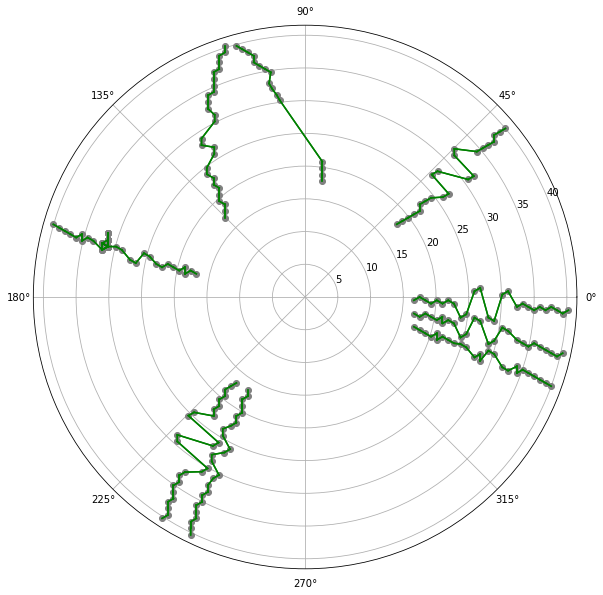

In [98]:
r = data["x"][:, 0].detach().numpy() * 100
phi = data["x"][:, 1].detach().numpy() * np.pi

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(10, 10))
plt.plot(phi, r, marker="o", linestyle="", color="gray")

gt = data.time_ordered_true_edges
n_gt = len(gt[0])

for i in range(n_gt):
    start_edge = gt[0][i]
    end_edge = gt[1][i]
    x = [phi[start_edge], phi[end_edge]]
    y = [r[start_edge], r[end_edge]]
    plt.plot(x, y, color="green")

plt.savefig("test6.pdf", dpi=300)

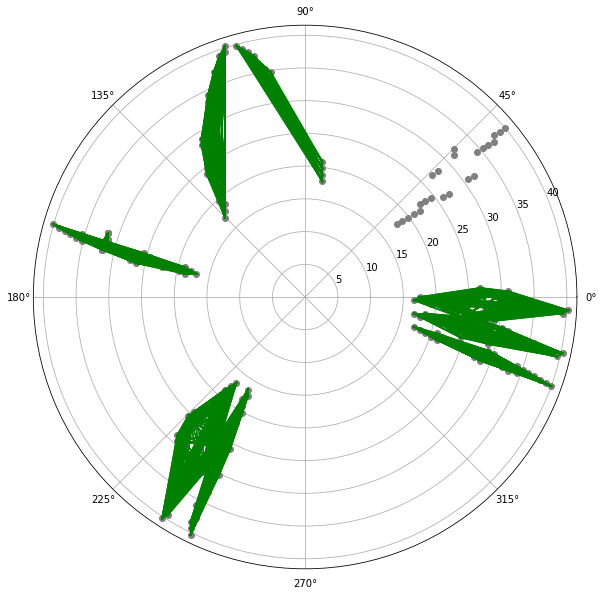

In [92]:
r = data["x"][:, 0].detach().numpy() * 100
phi = data["x"][:, 1].detach().numpy() * np.pi

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(10, 10))
plt.plot(phi, r, marker="o", linestyle="", color="gray")

input_edges = torch.cat([data["edge_index"], data["edge_index"].flip(0)], dim=-1)
y_pid = data["y_pid"].repeat(2)

# input_edges = input_edges[:, data.scores > 0.1]
# y_pid = y_pid[data.scores > 0.1]
# scores = data.scores[data.scores > 0.1]
n_input_edges = len(input_edges[1])
scores = data["scores"]

for input_edge in range(n_input_edges):
    edge = input_edges[:, input_edge].detach().numpy()
    r1 = r[edge[0]]
    r2 = r[edge[1]]
    phi1 = phi[edge[0]]
    phi2 = phi[edge[1]]
    if y_pid[input_edge] == 1:
        ax.plot(
            [phi1, phi2],
            [r1, r2],
            marker="",
            linestyle="-",
            color="green",
            alpha=scores[input_edge].item(),
        )
    elif y_pid[input_edge] == -1:
        # print(edge)
        ax.plot(
            [phi1, phi2],
            [r1, r2],
            marker="",
            linestyle="-",
            color="red",
            alpha=scores[input_edge].item(),
        )

# edge = [21, 23]
# r1 = r[edge[0]]
# r2 = r[edge[1]]
# phi1 = phi[edge[0]]
# phi2 = phi[edge[1]]
# ax.plot(
#     [phi1, phi2],
#     [r1, r2],
#     marker="",
#     linestyle="-",
#     color="red",
#     alpha=1,
# )

# print(r[22], phi[22], data.x[22,2])
# print(r[23], phi[23], data.x[23,2])

plt.savefig("test.pdf", dpi=300)

24235


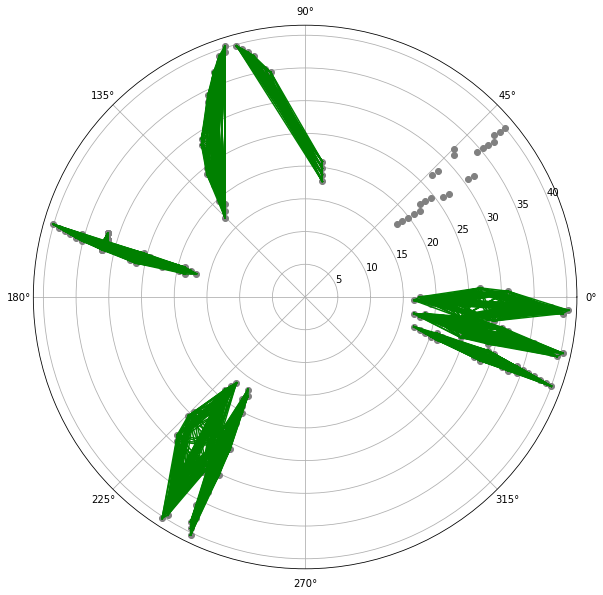

In [93]:
r = data["x"][:,0].detach().numpy() * 100
phi = data["x"][:,1].detach().numpy() * np.pi

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
plt.plot(phi, r, marker='o', linestyle='', color = "gray")

input_edges = torch.cat([data["edge_index"], data["edge_index"].flip(0)], dim=-1)
y_pid = data["y_pid"].repeat(2)
direction = np.append(np.ones(len(data["edge_index"][1])), np.zeros(len(data["edge_index"][1])))

direction_mask = data.x[input_edges[0], 0] < data.x[input_edges[1], 0]
input_edges = input_edges[:, direction_mask]
y_pid = y_pid[direction_mask]
direction = direction[direction_mask]
switch_i = np.where(direction == 0)[0][0]
print(switch_i)

# n_input_edges = len(data["edge_index"][1])
n_input_edges = int(len(input_edges[1]))

for input_edge in range(n_input_edges)[:switch_i]:
    if y_pid[input_edge] == 0:
        continue
    edge = input_edges[:,input_edge].detach().numpy()
    r1 = r[edge[0]]
    r2 = r[edge[1]]
    phi1 = phi[edge[0]]
    phi2 = phi[edge[1]]
    ax.plot([phi1,phi2], [r1,r2], marker='', linestyle='-', color='green')

plt.show()


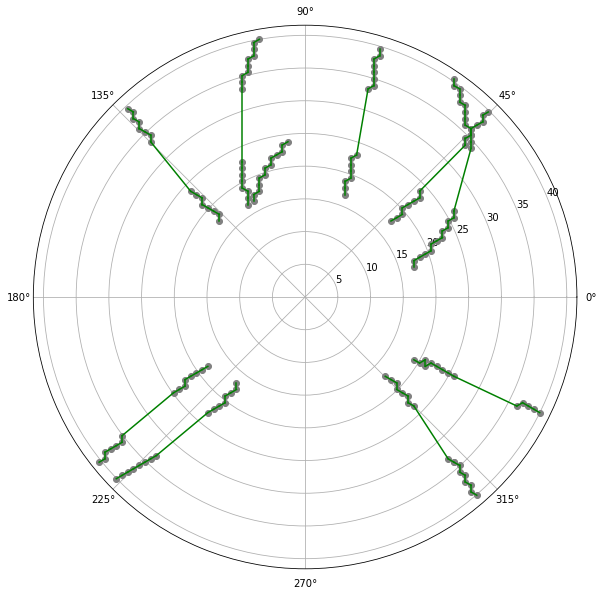

In [12]:
r = data["x"][:,0].detach().numpy() * 100
phi = data["x"][:,1].detach().numpy() * np.pi

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
plt.plot(phi, r, marker='o', linestyle='', color = "gray")

n_input_edges = len(data["edge_index"][1])

for input_edge in range(n_input_edges):
    if data["y_pid"][input_edge] == 0:
        continue
    edge = data["edge_index"][:,input_edge].detach().numpy()
    r1 = r[edge[0]]
    r2 = r[edge[1]]
    phi1 = phi[edge[0]]
    phi2 = phi[edge[1]]
    ax.plot([phi1,phi2], [r1,r2], marker='', linestyle='-', color='green')

plt.show()

In [29]:
true_scores = data["scores"][:len(data.y_pid)].detach().numpy()[data.y_pid == 1]
false_scores = data["scores"][:len(data.y_pid)].detach().numpy()[data.y_pid == 0]

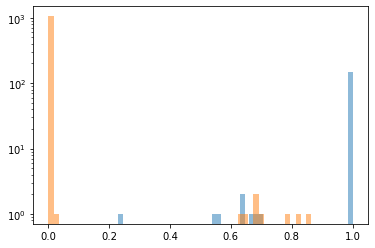

In [30]:
plt.hist(true_scores, bins=50, alpha=0.5)
plt.hist(false_scores, bins=50, alpha=0.5)
plt.yscale('log')
plt.show()

In [32]:
n_cuts = 1000
score_cuts = np.linspace(0,1,n_cuts)
eff = np.zeros(n_cuts)
rej = np.zeros(n_cuts)
false_positive = np.zeros(n_cuts)
false_negative = np.zeros(n_cuts)
true_scores = data["scores"][:len(data.y_pid)][y_pid == 1]
false_scores = data["scores"][y_pid == 0]
total_true = len(true_scores)
total_false = len(false_scores)
i = 0
for cut in score_cuts:
    n_true_acc = len(true_scores[true_scores > cut])
    n_false_rej = len(false_scores[false_scores <= cut])
    n_false_pos = len(false_scores[false_scores > cut])
    n_false_neg = len(true_scores[true_scores <= cut])
    false_positive[i] = (n_false_pos / total_false)
    false_negative[i] = (n_false_neg / total_true)
    eff[i] = (n_true_acc / total_true)
    rej[i] = (n_false_rej / total_false)
    i += 1

IndexError: The shape of the mask [1196] at index 0 does not match the shape of the indexed tensor [1223] at index 0

In [104]:
print("class imbalance")
print("percentage true",total_true/(total_false + total_true)*100,"%")
print("percentage false",total_false/(total_false + total_true)*100,"%")

class imbalance
percentage true 0.8605017573627438 %
percentage false 99.13949824263726 %


0.009009009009009009


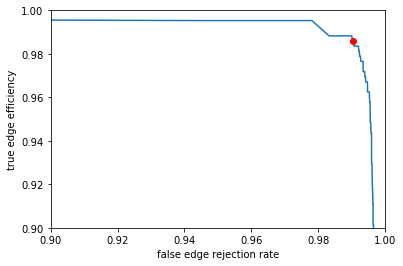

In [135]:
plt.plot(rej, eff, label="Efficiency")
plt.xlim(0.9,1)
plt.xlabel("false edge rejection rate")
plt.ylabel("true edge efficiency")
plt.ylim(0.9,1)

cut = np.where(rej > 0.99)[0][0]
print(score_cuts[cut])
plt.plot(rej[cut], eff[cut], marker='o', color='red')

plt.show()

In [126]:
y_pred = np.zeros(len(data["scores"]))

for i in range(len(data["scores"])):
    if data["scores"][i] > score_cuts[cut]:
        y_pred[i] = 1

cm = confusion_matrix(y_pid, y_pred)

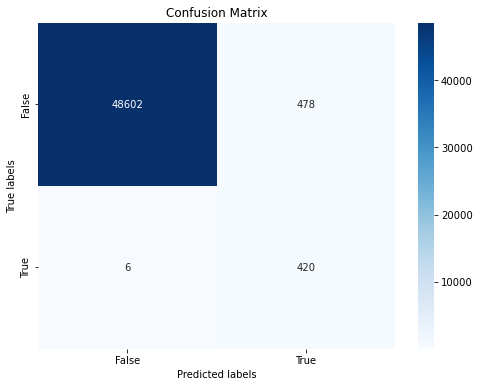

In [128]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pid), yticklabels=np.unique(y_pid))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

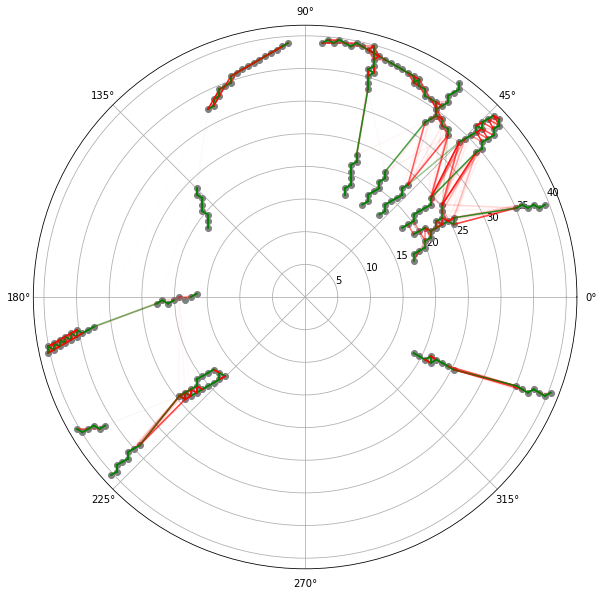

In [136]:
data = torch.load(f"{evt_num}",map_location=torch.device('cpu'))

r = data["x"][:,0].detach().numpy() * 100
phi = data["x"][:,1].detach().numpy() * np.pi

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
plt.plot(phi, r, marker='o', linestyle='', color = "gray")

input_edges = torch.cat([data["edge_index"], data["edge_index"].flip(0)], dim=-1)
y_pid = data["y_pid"].repeat(2)

# n_input_edges = len(data["edge_index"][1])
n_input_edges = len(input_edges[1])

for input_edge in range(n_input_edges):
    if data["scores"][input_edge].item() < score_cuts[cut]:
        continue
    edge = input_edges[:,input_edge].detach().numpy()
    r1 = r[edge[0]]
    r2 = r[edge[1]]
    phi1 = phi[edge[0]]
    phi2 = phi[edge[1]]
    if y_pid[input_edge] == 1:
        ax.plot([phi1,phi2], [r1,r2], marker='', linestyle='-', color='green', alpha=data["scores"][input_edge].item())
    else:
        ax.plot([phi1,phi2], [r1,r2], marker='', linestyle='-', color='red', alpha=data["scores"][input_edge].item())

plt.show()